# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("E:/email spam/email_dataset/email.csv")
print(df.head(10))

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...


In [3]:
print(df.shape)

(5573, 2)



#### Columns Meaning

#####     v1 is our label column. Which represent wether the email is spam or not spam.
#####     v2 column contains the text of the emails.

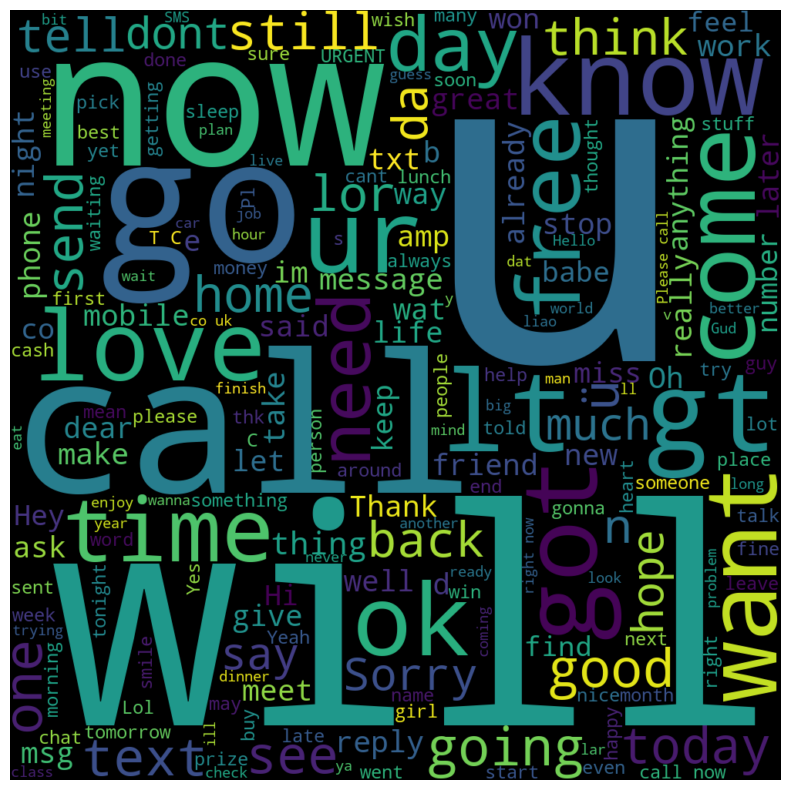

In [4]:
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(''.join(df.Message))


plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_8664\1716537253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Category"], data=df, palette='Set3')


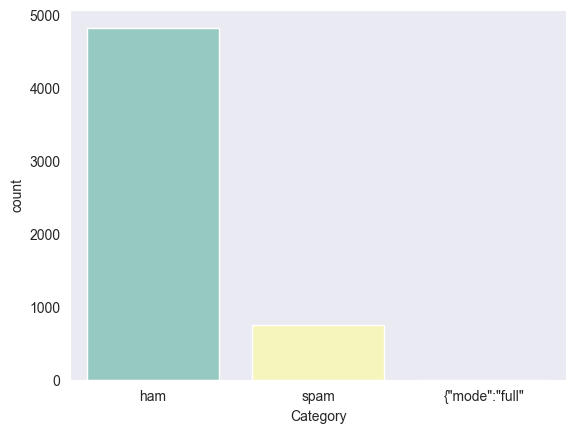

In [5]:
# Set seaborn style to dark
sns.set_style("dark")

# Create the count plot
sns.countplot(x=df["Category"], data=df, palette='Set3')

# Show the plot
plt.show()

In [6]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [7]:
df = df[df['Category'] != '{"mode":"full"']

In [8]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df['Category'] = df["Category"].map({'spam':1,'ham':0})

In [10]:
df.head()

Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...

## The dataset is not balanced so first we solve this problem

In [11]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class 

df_majority = df[(df['Category'] == 0)] 

df_minority = df[(df['Category'] == 1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 
replace = True,    # sample with replacement  
                                 
 n_samples = 4825, # to match majority class     
                                 
 random_state = 42) 

# reproducible results
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [12]:
df_upsampled['Category'].value_counts()

Category
0    4825
1    4825
Name: count, dtype: int64

In [13]:
df_upsampled.isnull().sum()

Category    0
Message     0
dtype: int64



Converting text data into vectors.

Machine learning models don't understand textual data. So we have to convert it into numerical form. There are many methods for doing this. For instance, Bag of words, TF-IDF, One-Hot encoding, Word Embedding, etc. We will use a bag of words and word2vec because it is very intuitive.



Bag of words:

In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.


Converting email texts into vectors.


In [14]:
# Remove the stop words and transform the texts into the vectorized input variables X
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df["Message"])

y = df["Category"]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=0)

Training the model

In [15]:
clf = GaussianNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8779904306220095

Word2vec

In [18]:
!pip install gensim

  Using cached gensim-4.3.2-cp39-cp39-win_amd64.whl.metadata (8.5 kB)
  Using cached smart_open-7.0.4-py3-none-any.whl.metadata (23 kB)
  Using cached wrapt-1.16.0-cp39-cp39-win_amd64.whl.metadata (6.8 kB)
Using cached gensim-4.3.2-cp39-cp39-win_amd64.whl (24.0 MB)
Using cached smart_open-7.0.4-py3-none-any.whl (61 kB)
Using cached wrapt-1.16.0-cp39-cp39-win_amd64.whl (37 kB)


In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Preprocessing: Tokenization
tokenized_texts = [word_tokenize(text.lower()) for text in df["Message"]]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Transform texts into Word2Vec embeddings
X = [word2vec_model.wv[token] for token in tokenized_texts]

y = df["Category"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
X_train

[array([[-2.12994274e-02,  1.16736054e+00, -3.44453216e-01,
         -2.92797357e-01, -1.56280860e-01, -1.01886523e+00,
         -7.25301877e-02,  1.68902481e+00, -2.30977833e-01,
         -5.81854641e-01,  2.47062594e-02, -4.78021443e-01,
          9.96204019e-02,  2.04043061e-01,  4.13296968e-01,
         -5.09213150e-01,  5.04361570e-01, -9.05200303e-01,
          1.79459944e-01, -1.54674923e+00,  2.39493966e-01,
         -2.08982289e-01,  6.10310793e-01, -5.32895327e-01,
         -5.95454156e-01,  2.74536222e-01, -5.00224471e-01,
         -3.17561269e-01, -6.57281995e-01,  2.67713815e-01,
          8.14821482e-01, -1.76235363e-01, -1.50501892e-01,
         -6.25542700e-01, -2.92748421e-01,  8.02005470e-01,
          2.82938600e-01, -4.97575194e-01, -5.66957831e-01,
         -1.12081671e+00, -5.25310338e-02, -1.91017643e-01,
         -4.75135408e-02,  4.22593392e-02,  6.69419110e-01,
         -4.77925748e-01, -4.56714690e-01, -4.11854327e-01,
          4.23266083e-01,  2.22289234e-0

In [25]:
from sklearn.svm import SVC

# Calculate the average Word2Vec embeddings for each text
X_train_avg = np.array([np.mean(text, axis=0) for text in X_train])
X_test_avg = np.array([np.mean(text, axis=0) for text in X_test])

# Initialize and train SVC classifier
clf = SVC(kernel='linear')
clf.fit(X_train_avg, y_train)

# Evaluate the classifier
accuracy = clf.score(X_test_avg, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9383971291866029
